1-0: Use a list comprehension to create a list of the squares of the numbers between 10 and 20, including the endpoints

In [2]:
squares = [x**2 for x in range(1,21)]
print(squares)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400]


1-1: Write a Python program to print out the first N numbers in the Fibonacci
sequence. The program should ask the user for N, and should
require that N be greater than 2.

In [3]:
def fibonacci(n):
    seq = [1,1]
    if n > 2:
        for i in range(n-2):
            seq.append(seq[-1]+seq[-2])
    return seq

limit = int(input("Enter N: "))
print(fibonacci(limit))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


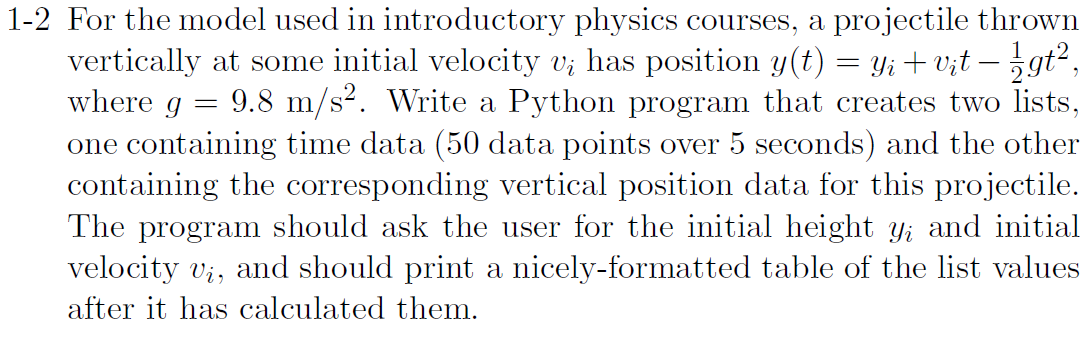